0.0 0.0 0.0 -0.35 0.35
Start Indexing Basis Set
The number of 1-particle basis is  8
We did not include 3-particle basis set
The number of CT basis is  20
We did not include CTv basis set
We did not include Triplet Pair basis set
We did not include Triplet Pair with vibration basis set
The total dimension of the Hamiltonian is  40
Indexing basis set done
Time consumed by indexing basis set is 0.0
Start generating Hamiltonian
We did not include 3-particle basis set
We did not include CTv basis set
We did not include Triplet pair basis set
We did not include Triplet pair with vibration basis set
We did not include 2 particle nor 3 particle basis set and then the off-diagonal block is zero
We did not include 2P basis set or CT basis set and then the off-diagonal block is zero
We did not include 3P basis set or CTv basis set and then the off-diagonal block is zero
We did not include TP basis set nor CT basis set and then the off-diagonal block is zero
We did not include TPv basis set nor C

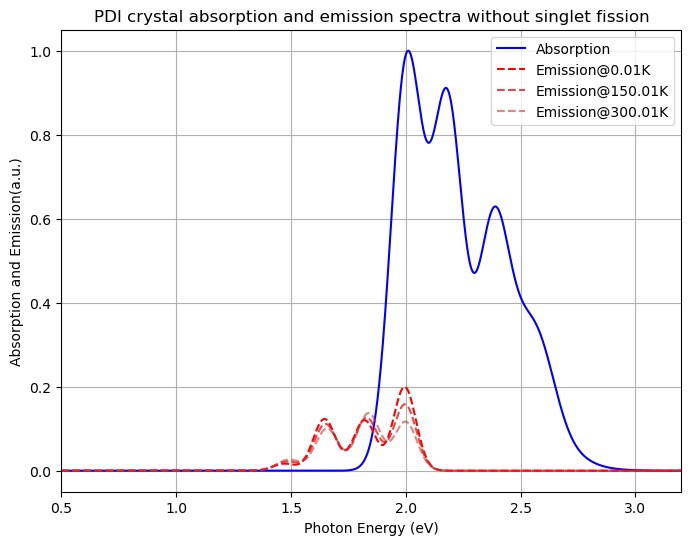

In [1]:
import time as tm
import matplotlib.pyplot as plt
import matplotlib.dates  as dates
import numpy as np
import json
import math

from Oscillator_S import OSC
from Absorption_plotting import Abs
from Dia_EE import DEE
from Emission_plotting import EMI_SP

##step 0, reading parameters from params.json

# Open the file and load the data as a dictionary

with open('parameters.json') as f:
    parameters = json.load(f)



    abs_freq_fac_switch = parameters["Abs_plotting"]['abs_freq_fac_switch']
    step = parameters["Abs_plotting"]['step']
    step_width = parameters["Abs_plotting"]['step_width']
    le_sigma = parameters["Abs_plotting"]['le_sigma']
    he_sigma = parameters["Abs_plotting"]['he_sigma']
    wcut = parameters["Abs_plotting"]['wcut']
    Normalized = parameters["Abs_plotting"]['Normalized']
    calc_Emi = parameters['Emi_plotting']['calc_Emi']
    Emi_Temp_depen = parameters['Emi_plotting']['Emi_Temp_depen']
    TOT_N_Temp = parameters['Emi_plotting']['TOT_N_Temp']
    Initial_Temp = parameters['Emi_plotting']['Initial_Temp']
    Temp_step = parameters['Emi_plotting']['Temp_step']
    add_TP = parameters["basis_set_options"]['add_TP']
    add_TPv = parameters["basis_set_options"]['add_TPv']

###The most important arrays and parameters!!!
###The most important arrays and parameters!!!
###The most important arrays and parameters!!!
#Diagonalization and get the eigenvalue with eigenvetors
my_Diag = DEE()
my_evalue , my_evect , kcount = my_Diag.Diag_Ham()
    
##step 3, calculating oscillator strength and plotting absorption spectrum
##3.1, Oscillator strength calculation
OSC_X = np.zeros( kcount)
OSC_Y = np.zeros( kcount)
my_OSC = OSC( kcount,  my_evect, my_evalue )
OSC_X , OSC_Y = my_OSC.cal_OSC()

#OSC_X_se , OSC_Y_se =  my_OSC.cal_OSC_se()


##3.2, calculating absortion spectrum
x = np.zeros(step)
abs_tot = np.zeros(step)
my_ABS = Abs( kcount , my_evalue , OSC_X, OSC_Y )
x , abs_tot = my_ABS.cal_ABS()

##3.3,We will calculate the emission spectrum, if needed
if (calc_Emi): 
    if ( Emi_Temp_depen and TOT_N_Temp > 1 ):
        emi_tot = np.zeros( ( step, TOT_N_Temp ),dtype=float)   
        calc_emi_sp = EMI_SP( kcount , my_evect , my_evalue)
        emi_x, emi_tot = calc_emi_sp.cal_EMI()
    else:
        emi_tot = np.zeros( step, dtype=float)   
        calc_emi_sp = EMI_SP( kcount , my_evect , my_evalue)
        emi_x, emi_tot = calc_emi_sp.cal_EMI()

#if (Nomalized):
    #bmax = np.max(abs_tot)
    #emax = np.max(emi_tot)
    #abs_tot = abs_tot / bmax
    #emi_tot = emi_tot / emax


##4, plotting absortion and emission spectra
# Plotting abs_tot versus x
plt.figure(figsize=(8, 6))
plt.plot(x, abs_tot, linestyle='-', color='b', label='Absorption')

if(calc_Emi):
    if (Emi_Temp_depen): ##with temperature dependence
        if (TOT_N_Temp == 1):
            plt.plot(emi_x, emi_tot, linestyle='--', color='r', label=f'Emission@{Initial_Temp}K')
        else:##multiple temperature
            Tem_kelvin = np.zeros(TOT_N_Temp, dtype=float)
            for i in range( 0 , TOT_N_Temp ):
                alpha_value = 1 - 0.2 * (i)  # Transparency value between 0.2 and 1.0
                Tem_kelvin[i] = Initial_Temp + np.multiply( i , Temp_step , dtype=float )
                plt.plot(emi_x, emi_tot[ :, i], linestyle='--', color=(1-i*0.1 , i*0.1 , i*0.1), alpha=alpha_value, label=f'Emission@{Tem_kelvin[i]:4.2f}K')
    else: ## no temperature dependence
        plt.plot(emi_x, emi_tot, linestyle='--', color='r', label=f'Emission@0K')

plt.xlim( 0.5 , 3.2 )
#plt.ylim( 0 , 0.15 )
# Adding labels and title
plt.xlabel('Photon Energy (eV)')
if (calc_Emi):
    plt.ylabel('Absorption and Emission(a.u.)')
    if (add_TP or add_TPv):
        plt.title('PDI crystal absorption and emission spectra with singlet fission')
    else:
        plt.title('PDI crystal absorption and emission spectra without singlet fission')
else:
    plt.ylabel('Absorption (a.u.)')
    if (add_TP or add_TPv):
        plt.title('PDI crystal absorption spectra with singlet fission')
    else:
        plt.title('PDI crystal absorption spectra without singlet fission')
# Optionally, add a grid
plt.grid(True)
plt.legend(loc = "upper right")
# Show the plot
plt.show()
##step 4, calculating emission spectrum and plotting it





